## Machine Learning Lab Assignment - 5

**Author** - Tirth Modi (202201513)

## Simple Regression Models Assignment
Objective:
The aim of this assignment is to understand and implement various regression techniques such as
Linear Regression, Polynomial Regression, and Ridge Regression using Python and Scikit-learn.

In [105]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
# Importing Dataset
df = pd.read_csv("C:\LABs\sem-5 ML\lab5\winequality-red.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [107]:
x = df.drop(columns=['quality'])
y = df['quality']

In [108]:
# Split the Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

1. Linear Regression
- Load a dataset of your choice (e.g., California housing prices or a custom dataset).
- Split the data into training and testing sets.
- Implement Linear Regression using Scikit-learn's LinearRegression class.
- Fit the model to the training data and predict on the testing set.
- Evaluate the performance using Mean Squared Error (MSE) and R-squared metrics.
- Task: Write code to load the data, implement Linear Regression, and evaluate the performance.

In [109]:
# Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Prediction
y_pred = model.predict(x_test)

In [110]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.39
R-squared: 0.40


2. Polynomial Regression
- Using the same dataset as in Question 1, apply Polynomial Regression with degree 3.
- Use Scikit-learn's PolynomialFeatures to transform the input features.
- Fit a Linear Regression model on the transformed polynomial features.
- Evaluate the model's performance with MSE and R-squared.
- Task: Write code to apply Polynomial Regression and compare its performance with Linear
Regression.

In [111]:
# Create polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)

# Transform the features to polynomial features
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [112]:
# Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train_poly, y_train)

# Prediction
y_pred = model.predict(x_test_poly)

In [113]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.51
R-squared: 0.22


3. Ridge Regression
- Apply Ridge Regression to the dataset.
- Use Scikit-learn's Ridge class to implement Ridge Regression.
- Test the effect of different values of the regularization parameter (alpha).
- Plot the model's performance (MSE or R-squared) for different alpha values.
- Task: Implement Ridge Regression and plot the performance for various alpha values.

In [114]:
# Ridge Regression model (alpha is the regularization strength)
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_model.fit(x_train, y_train)

# Predict on the testing set
y_pred = ridge_model.predict(x_test)

In [115]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.39
R-squared: 0.40


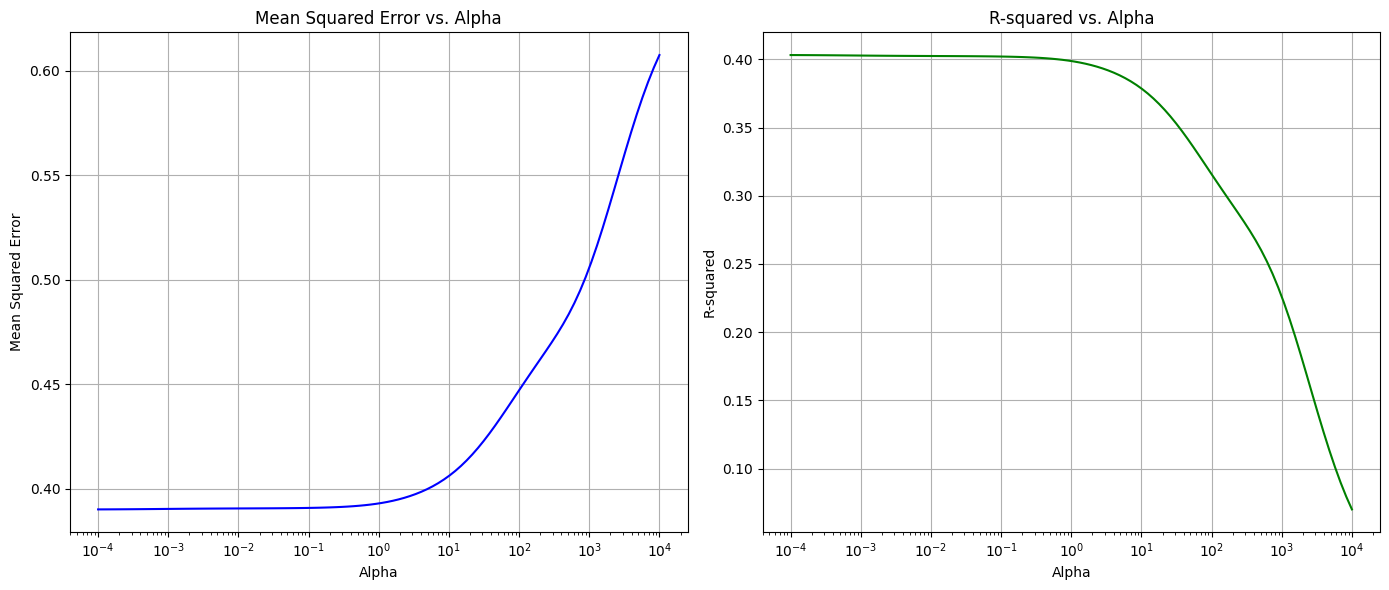

In [116]:
# List of alpha values to test
alpha_values = np.logspace(-4, 4, 100)
mse_values = []
r2_values = []

# Loop through each alpha value
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_train, y_train)
    y_pred = ridge_model.predict(x_test)

    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_values.append(mse)
    r2_values.append(r2)

# Plot MSE and R-squared against alpha values
plt.figure(figsize=(14, 6))

# MSE Plot
plt.subplot(1, 2, 1)
plt.semilogx(alpha_values, mse_values, color='blue')
plt.title('Mean Squared Error vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.grid()

# R-squared Plot
plt.subplot(1, 2, 2)
plt.semilogx(alpha_values, r2_values, color='green')
plt.title('R-squared vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.grid()

plt.tight_layout()
plt.show()

4. Comparison of Models

- Compare the performance of the Linear, Polynomial, and Ridge Regression models.
- Based on MSE and R-squared, write a brief report discussing which model performed better and
why.
- Task: Compare and analyze the results of the three models in terms of accuracy and complexity.

### Comparison of Models:

**Linear Regression**:

- MSE: Generally higher due to its simplicity and inability to capture non-linear relationships. 
- R²: Lower, indicating it struggles to explain variance in the data when the relationship is non-linear.
- Conclusion: Performs poorly for complex, non-linear data but is straightforward and computationally efficient.

**Polynomial Regression**:

- MSE: Lower than linear regression for higher degree polynomials as it captures non-linear trends better.
- R²: Higher, indicating improved data fit, especially for moderate degrees.
- Conclusion: Balances accuracy and complexity, but overfitting can occur for very high degrees (too flexible).

**Ridge Regression**:

- MSE: Comparable to polynomial regression but with regularization, preventing overfitting.
- R²: Similar to polynomial regression but slightly lower due to regularization.
- Conclusion: Best for reducing overfitting while maintaining predictive power, striking a balance between complexity and performance.

Overall: Ridge regression tends to perform best due to its ability to handle complexity without overfitting, while polynomial regression works well but risks overfitting for high degrees. Linear regression is the simplest but least effective for non-linear data.

5. Optional: Lasso Regression
- Apply Lasso Regression to the dataset using Scikit-learn's Lasso class.
- Compare the performance of Lasso with Ridge Regression.
- Task: Write code to implement Lasso Regression and evaluate its performance compared to Ridge.

In [117]:
# Lasso Regression model (alpha is the regularization strength)
alpha = 1.0
lasso_model = Lasso(alpha=alpha)

# Fit the model to the training data
lasso_model.fit(x_train, y_train)

# Predict on the testing set
y_pred = lasso_model.predict(x_test)

In [118]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.65
R-squared: 0.01
